<a href="https://colab.research.google.com/github/chominyeong/Tobigs20/blob/main/NLPBasic/Week7_NLPBasic_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Basic Assignment
## 과제 : spam.csv를 활용하여 유의미한 해석을 도출해주세요!

In [20]:
import pandas as pd
import numpy as np

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다.
- 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
spam = pd.read_csv('/content/drive/MyDrive/Tobigs20_week7_nlp_basic/spam.csv')

In [4]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [5]:
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Tokenizing


#### NLTK 1

In [6]:
import nltk

In [7]:
spam_nltk1 = spam.copy()

from nltk.tokenize import word_tokenize
nltk.download('punkt')

spam_nltk1['v3'] = spam_nltk1['v2'].apply(word_tokenize)
spam_nltk1.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,v1,v2,v3
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


#### NLTK 2

In [8]:
spam_nltk2 = spam.copy()

from nltk.tokenize import WordPunctTokenizer
nltk.download('punkt')

spam_nltk2['v3'] = spam_nltk2['v2'].apply(WordPunctTokenizer().tokenize)
spam_nltk2.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,v1,v2,v3
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, don, ', t, think, he, goes, to, usf, ..."


#### 불용어 제거 후 NLTK

In [9]:
import re
from nltk.corpus import stopwords

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
STOPWORDS = set(stopwords.words('english'))

def 불용어제거(텍스트):
    # 소문자로 변환
    텍스트 = 텍스트.lower()

    # 특수문자 제거
    텍스트 = re.sub(r'[^0-9a-zA-Z]', ' ', 텍스트)    #0-9a-zA-Z이 아니면^(특수문자면) 스페이스로,

    # 추가 빈 칸 제거
    텍스트 = re.sub(r'\s+', ' ', 텍스트)

    # remove stopwords
    텍스트 = " ".join(word for word in 텍스트.split() if word not in STOPWORDS)

    return 텍스트

In [13]:
spam_nltk3 = spam.copy()

# 불용어제거
spam_nltk3['v2_stopwords'] = spam_nltk3['v2'].apply(불용어제거)

In [14]:
# 단어 토큰화
spam_nltk3['v3'] = spam_nltk3['v2_stopwords'].apply(word_tokenize)
spam_nltk3.head()

,v1,v2,v2_stopwords,v3
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,"[nah, think, goes, usf, lives, around, though]"


## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram 등이 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

#### One-hot encoding

In [23]:
nouns = spam_nltk3['v3'][0]
nouns

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

In [24]:
# Build word dictionary and give index by word
dics = {}
for word in nouns:
    if word not in dics.keys():
        dics[word] = len(dics)
print(dics)
print()
# One-Hot-Encoding
nb_classes = len(dics)
targets = list(dics.values())
one_hot_targets = np.eye(nb_classes)[targets]
print(one_hot_targets)

{'go': 0, 'jurong': 1, 'point': 2, 'crazy': 3, 'available': 4, 'bugis': 5, 'n': 6, 'great': 7, 'world': 8, 'la': 9, 'e': 10, 'buffet': 11, 'cine': 12, 'got': 13, 'amore': 14, 'wat': 15}

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1

#### Word2Vec

In [70]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=spam_nltk3['v3'], vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [71]:
model.wv.most_similar("free")  #free 와 유사한 단어들

[('txt', 0.9996721744537354),
 ('mobile', 0.9996565580368042),
 ('reply', 0.9995936155319214),
 ('nokia', 0.9995604157447815),
 ('tone', 0.999510645866394),
 ('text', 0.9994899034500122),
 ('2', 0.9994808435440063),
 ('150p', 0.9994778037071228),
 ('stop', 0.9994696378707886),
 ('50', 0.9994642734527588)]

In [72]:
model.wv.most_similar("u")  #u 와 유사한 단어들

[('n', 0.9996620416641235),
 ('go', 0.9996414184570312),
 ('already', 0.9996271133422852),
 ('say', 0.9996178150177002),
 ('r', 0.9996001720428467),
 ('give', 0.9995989799499512),
 ('got', 0.9995970129966736),
 ('ok', 0.9995856881141663),
 ('meet', 0.9995757937431335),
 ('still', 0.9995736479759216)]

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

spam 메일에서 가장 빈도가 높은 단어와 ham 메일에서 가장 빈도가 높은 단어들에 대해 워드클라우드를 생성해 보겠습니다.

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import numpy as np

In [61]:
# 스펨데이터와 햄데이터 각각 나누기
spamdata = spam_nltk3[spam_nltk3['v1'] == 'spam'].reset_index()
hamdata = spam_nltk3[spam_nltk3['v1'] == 'ham'].reset_index()

#### spam 데이터

In [66]:
# 스펨데이터에 대해 토큰화한 단어들 리스트로 합치기
spam_lst = []
for i in range(len(spamdata)):
  spam_lst.extend(spamdata['v3'][i])

print(spam_lst)

['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', '87121', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply', '08452810075over18', 'freemsg', 'hey', 'darling', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', '1', '50', 'rcv', 'winner', 'valued', 'network', 'customer', 'selected', 'receivea', '900', 'prize', 'reward', 'claim', 'call', '09061701461', 'claim', 'code', 'kl341', 'valid', '12', 'hours', 'mobile', '11', 'months', 'u', 'r', 'entitled', 'update', 'latest', 'colour', 'mobiles', 'camera', 'free', 'call', 'mobile', 'update', 'co', 'free', '08002986030', 'six', 'chances', 'win', 'cash', '100', '20', '000', 'pounds', 'txt', 'csh11', 'send', '87575', 'cost', '150p', 'day', '6days', '16', 'tsandcs', 'apply', 'reply', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', '100', '000', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'www', 'd

In [67]:
# 빈도수 세기
spam_c = Counter(spam_lst)
spam_c

Counter({'free': 224,
         'entry': 26,
         '2': 206,
         'wkly': 14,
         'comp': 10,
         'win': 64,
         'fa': 4,
         'cup': 5,
         'final': 16,
         'tkts': 4,
         '21st': 2,
         'may': 7,
         '2005': 3,
         'text': 125,
         '87121': 4,
         'receive': 33,
         'question': 7,
         'std': 11,
         'txt': 163,
         'rate': 30,
         'c': 57,
         'apply': 30,
         '08452810075over18': 2,
         'freemsg': 14,
         'hey': 5,
         'darling': 2,
         '3': 45,
         'week': 60,
         'word': 25,
         'back': 23,
         'like': 13,
         'fun': 9,
         'still': 7,
         'tb': 1,
         'ok': 5,
         'xxx': 11,
         'chgs': 1,
         'send': 70,
         '1': 112,
         '50': 57,
         'rcv': 2,
         'winner': 16,
         'valued': 11,
         'network': 25,
         'customer': 49,
         'selected': 25,
         'receivea': 2,
     

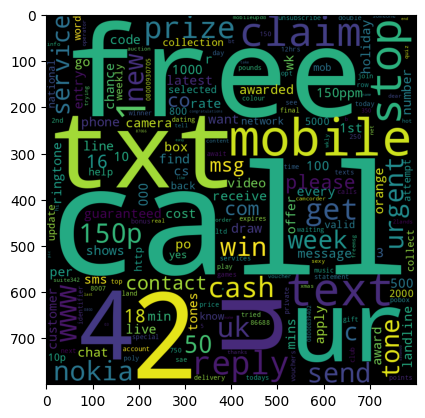

In [68]:
wc = WordCloud(width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(spam_c)
plt.figure()
plt.imshow(gen)

↳ 위에서 word2vec으로 free와 가장 연관이 높은 단어를 확인했을 때 아래와 같은 결과가 나왔다. 스펨에서 빈도가 높은 단어와 겹치는 단어가 많은 것으로 보아 유사도를 잘 추출했다.



In [ ]:
'''
[('txt', 0.9996721744537354),
 ('mobile', 0.9996565580368042),
 ('reply', 0.9995936155319214),
 ('nokia', 0.9995604157447815),
 ('tone', 0.999510645866394),
 ('text', 0.9994899034500122),
 ('2', 0.9994808435440063),
 ('150p', 0.9994778037071228),
 ('stop', 0.9994696378707886),
 ('50', 0.9994642734527588)]
'''

#### ham 데이터

In [69]:
# 스펨데이터에 대해 토큰화한 단어들 리스트로 합치기
ham_lst = []
for i in range(len(hamdata)):
  ham_lst.extend(hamdata['v3'][i])

print(ham_lst)

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat', 'ok', 'lar', 'joking', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say', 'nah', 'think', 'goes', 'usf', 'lives', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent', 'per', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'callers', 'press', '9', 'copy', 'friends', 'callertune', 'gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymore', 'tonight', 'k', 'cried', 'enough', 'today', 'searching', 'right', 'words', 'thank', 'breather', 'promise', 'wont', 'take', 'help', 'granted', 'fulfil', 'promise', 'wonderful', 'blessing', 'times', 'date', 'sunday', 'oh', 'k', 'watching', 'eh', 'u', 'remember', '2', 'spell', 'name', 'yes', 'v', 'naughty', 'make', 'v', 'wet', 'fine', 'way', 'u', 'feel', 'way', 'gota', 'b', 'seriously', 'spell', 'name', '

In [73]:
# 빈도수 세기
ham_c = Counter(ham_lst)
ham_c

Counter({'go': 249,
         'jurong': 1,
         'point': 13,
         'crazy': 10,
         'available': 15,
         'bugis': 7,
         'n': 143,
         'great': 104,
         'world': 37,
         'la': 7,
         'e': 84,
         'buffet': 2,
         'cine': 7,
         'got': 244,
         'amore': 1,
         'wat': 106,
         'ok': 287,
         'lar': 38,
         'joking': 6,
         'wif': 27,
         'u': 1018,
         'oni': 4,
         'dun': 55,
         'say': 92,
         'early': 33,
         'hor': 2,
         'c': 63,
         'already': 90,
         'nah': 10,
         'think': 128,
         'goes': 26,
         'usf': 11,
         'lives': 4,
         'around': 59,
         'though': 26,
         'even': 56,
         'brother': 19,
         'like': 232,
         'speak': 23,
         'treat': 16,
         'aids': 1,
         'patent': 1,
         'per': 12,
         'request': 7,
         'melle': 6,
         'oru': 4,
         'minnaminunginte': 3,


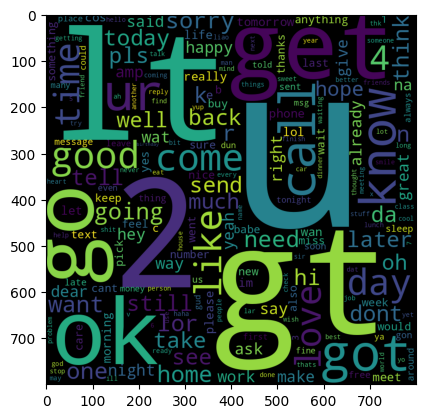

In [74]:
wc = WordCloud(width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(ham_c)
plt.figure()
plt.imshow(gen)

아래는 word2vec를 이용해 'u'와 유사한 단어를 추출한 것이다. ham 메일에 대해 빈도수별 워드클라우드를 나타냈을 때 중복되는 단어가 추출된 것으로 보아 유사도는 신뢰할 만 하다.

In [ ]:
'''
[('n', 0.9996620416641235),
 ('go', 0.9996414184570312),
 ('already', 0.9996271133422852),
 ('say', 0.9996178150177002),
 ('r', 0.9996001720428467),
 ('give', 0.9995989799499512),
 ('got', 0.9995970129966736),
 ('ok', 0.9995856881141663),
 ('meet', 0.9995757937431335),
 ('still', 0.9995736479759216)]
'''